In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Dense,Input
from keras.models import Model

Using TensorFlow backend.


In [0]:
(X_train,_),(X_test,_) = mnist.load_data()

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_trainNoise = X_train + np.random.normal(0,0.5,X_train.shape)
X_testNoise = X_test + np.random.normal(0,0.5,X_test.shape)

print(X_trainNoise.shape)
print(X_testNoise.shape)

(60000, 784)
(10000, 784)


![alt text](https://cdn-images-1.medium.com/max/800/1*EQU7F2dZ6p7_qiA_OS6qQg.png)

In [0]:
def denoisingAutoEncoders():
  
  inputImage = Input(shape=(784,))
  
  encode = Dense(units=128,activation="relu")(inputImage)
  encode = Dense(units=64,activation="relu")(encode)
  encode = Dense(units=32,activation="relu")(encode)
  
  decode = Dense(units=64,activation="relu")(encode)
  decode = Dense(units=128,activation="relu")(decode)
  decode = Dense(units=784,activation="relu")(decode)
  
  
  autoencoder = Model(inputImage,decode)
  encoder = Model(inputImage,encode)
  
  autoencoder.compile(loss="binary_crossentropy",metrics=['accuracy'],optimizer='adam')
  
  return (autoencoder,encoder)

In [0]:
model,encoder = denoisingAutoEncoders()

In [0]:
h = model.fit(X_test,X_test,batch_size=256,epochs=50,validation_data=(X_test,X_test))

Instructions for updating:
Use tf.cast instead.
Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 169us/step - loss: 0.6932 - acc: 0.7976 - val_loss: 0.5611 - val_acc: 0.8010
Epoch 2/50
10000/10000 [==============================] - 1s 143us/step - loss: 0.5505 - acc: 0.7985 - val_loss: 0.5383 - val_acc: 0.7983
Epoch 3/50
10000/10000 [==============================] - 1s 145us/step - loss: 0.5268 - acc: 0.7966 - val_loss: 0.5105 - val_acc: 0.7977
Epoch 4/50
10000/10000 [==============================] - 1s 143us/step - loss: 0.4988 - acc: 0.7977 - val_loss: 0.4830 - val_acc: 0.7978
Epoch 5/50
10000/10000 [==============================] - 1s 143us/step - loss: 0.4714 - acc: 0.7993 - val_loss: 0.4598 - val_acc: 0.7991
Epoch 6/50
10000/10000 [==============================] - 1s 145us/step - loss: 0.4466 - acc: 0.8002 - val_loss: 0.4375 - val_acc: 0.8002
Epoch 7/50
10000/10000 [==============================] - 1s 144us/step - 

In [0]:
predictedImages = model.predict(X_testNoise)
encodedImages = encoder.predict(X_testNoise)

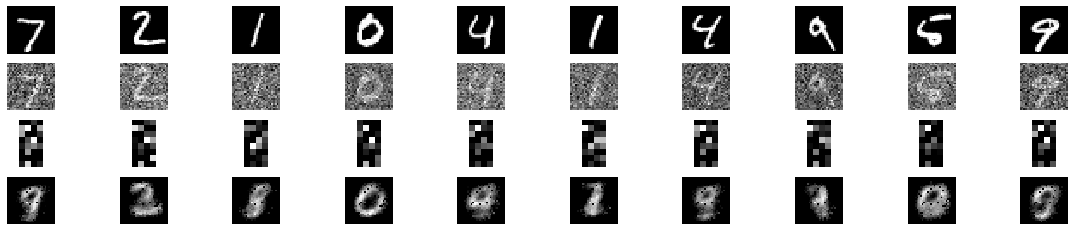

In [0]:
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_testNoise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display encoded images    
    ax = plt.subplot(4, 20, 2*20+i + 1 )
    plt.imshow(encodedImages[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display reconstruction images
    ax = plt.subplot(4, 20, 3*20 +i+ 1)
    plt.imshow(predictedImages[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()